In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import meanabs, mse, rmse

D:\Anaconda\envs\tsa_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [2]:
df = pd.read_csv('Data/RestaurantVisitors.csv',index_col=0,parse_dates=True)
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [3]:
df.shape

(517, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2016-01-01 to 2017-05-31
Data columns (total 8 columns):
weekday         517 non-null object
holiday         517 non-null int64
holiday_name    517 non-null object
rest1           478 non-null float64
rest2           478 non-null float64
rest3           478 non-null float64
rest4           478 non-null float64
total           478 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 36.4+ KB


In [5]:
df.index.freq = 'D'

In [6]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna()
df.shape

(478, 8)

In [8]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
df.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [10]:
for col in ['rest1', 'rest2', 'rest3','rest4', 'total']:
    df[col] = df[col].astype(int)

In [11]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


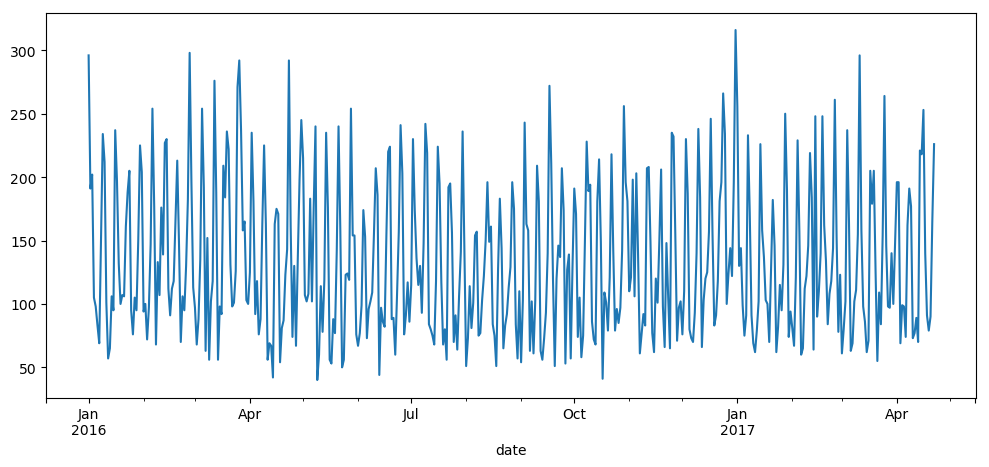

In [12]:
df['total'].plot(figsize=(12,5));

In [13]:
df.query('holiday==1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [14]:
df[df.holiday == 1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

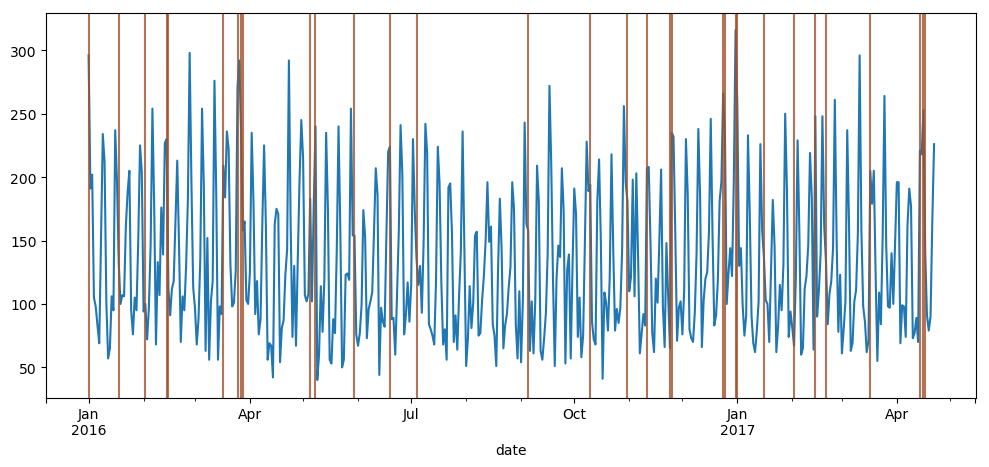

In [15]:
ax = df['total'].plot(figsize=(12,5))

for holiday in df.query('holiday==1').index:
    ax.axvline(x=holiday,color='sienna',alpha=0.8);

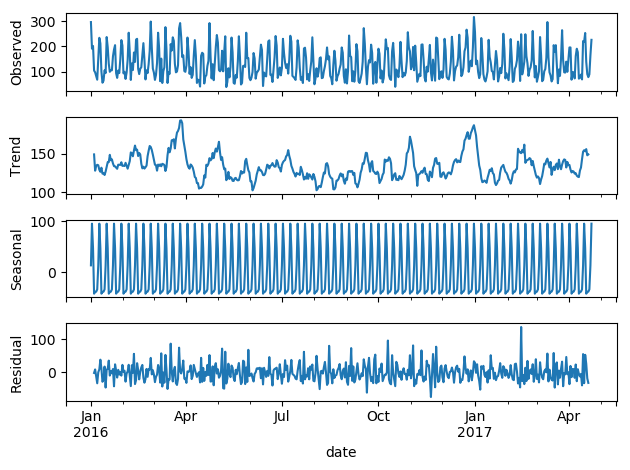

In [16]:
results = seasonal_decompose(df['total'],model='additive')
results.plot();

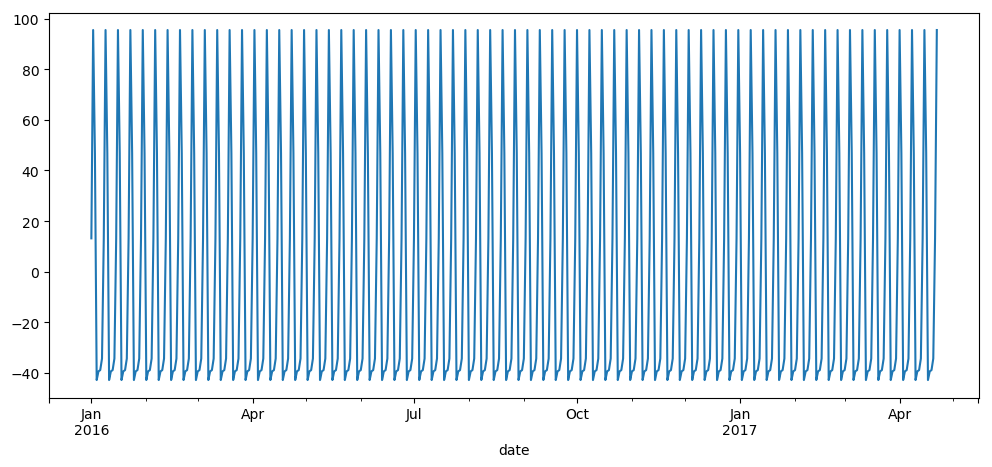

In [17]:
results.seasonal.plot(figsize=(12,5));

In [18]:
len(df)

478

In [19]:
train = df[:422]
test = df[422:]

In [20]:
train.shape, test.shape

((422, 8), (56, 8))

In [21]:
sarima = auto_arima(df['total'],seasonal=True,trace=False,suppress_warnings=False,m=7)
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Sat, 21 Sep 2024   AIC                           4845.442
Time:                                   15:58:44   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5662      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3967     86.679     16.468      0.000    1257.510    1597.283
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# ValueError: non-invertible starting MA parameters found -> remove invertibility
sarima = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7))
results = sarima.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  422
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2157.079
Date:                           Sat, 21 Sep 2024   AIC                           4322.159
Time:                                   15:58:44   BIC                           4338.339
Sample:                               01-01-2016   HQIC                          4328.553
                                    - 02-25-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2134      0.048      4.431      0.000       0.119       0.308
ar.S.L7        0.5076      0.037     13.829      0.000       0.436       0.580
ar.S.L14       0.4567      0.038     11.992      0.000       0.382       0.531
sigma2      1545.6135     85.222     18.136      0.000    1378.582    1712.645
===================================================================================
Ljung-Box (Q):                       81.77   Jarque-Bera (JB):                26.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.33
Prob(H) (two-sided):                  0.79   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
test_predictions = results.predict(start=len(train),end=len(train)+len(test)-1,typ='levels').rename('SARIMAX Predictions')
test_predictions

2017-02-26    173.750589
2017-02-27     98.843084
2017-02-28    156.235644
2017-03-01     95.993444
2017-03-02    110.145655
2017-03-03    137.031114
2017-03-04    245.737666
2017-03-05    162.175918
2017-03-06    111.366754
2017-03-07    117.664222
2017-03-08     98.046546
2017-03-09    109.796821
2017-03-10    135.317223
2017-03-11    243.926894
2017-03-12    161.666922
2017-03-13    101.668007
2017-03-14    131.074679
2017-03-15     93.605487
2017-03-16    106.032817
2017-03-17    131.264710
2017-03-18    236.037734
2017-03-19    156.122615
2017-03-20    102.464406
2017-03-21    120.266739
2017-03-22     92.288886
2017-03-23    103.962959
2017-03-24    128.425011
2017-03-25    231.206367
2017-03-26    153.075958
2017-03-27     98.439400
2017-03-28    120.905109
2017-03-29     89.592446
2017-03-30    101.193375
2017-03-31    125.132910
2017-04-01    225.151196
2017-04-02    148.997533
2017-04-03     96.760067
2017-04-04    116.293340
2017-04-05     87.622504
2017-04-06     98.842307


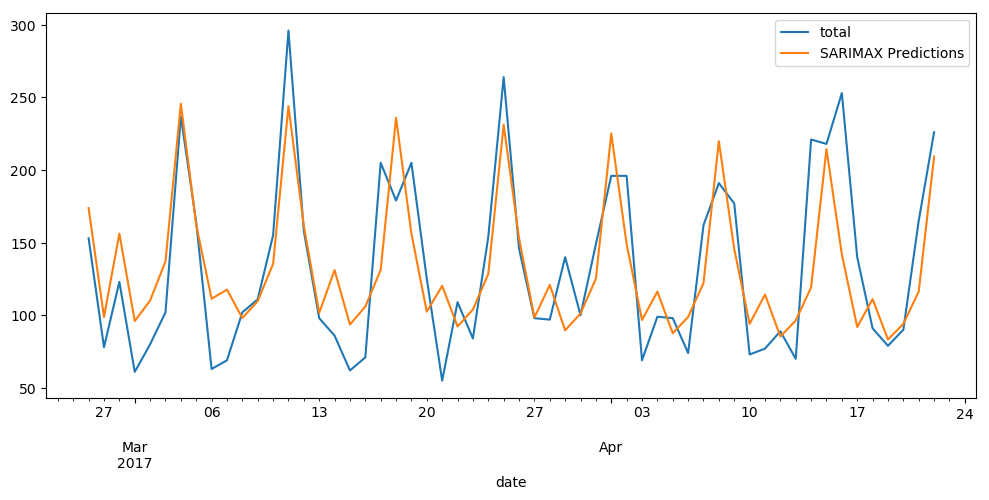

In [24]:
test.total.plot(figsize=(12,5),legend=True)
test_predictions.plot(legend=True);

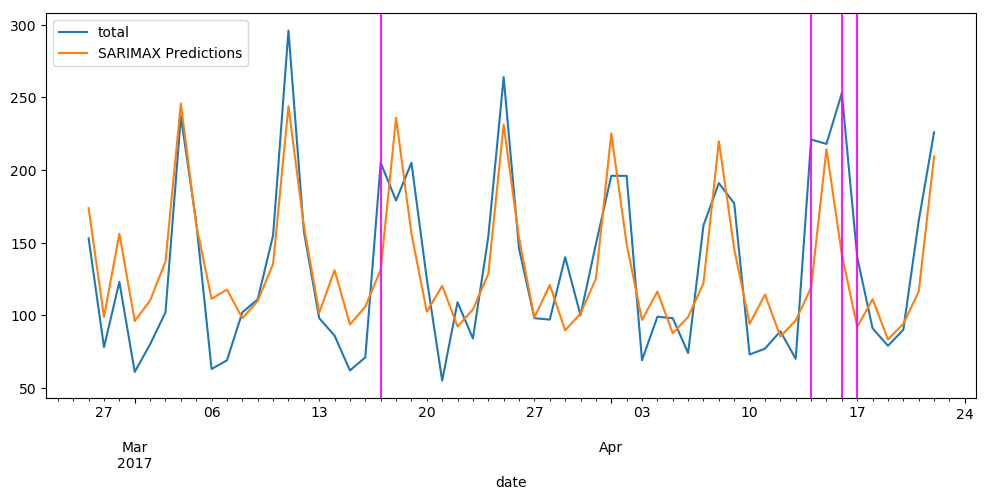

In [25]:
ax = test.total.plot(figsize=(12,5),legend=True)
test_predictions.plot(legend=True,ax=ax)

for holiday in test.query('holiday==1').index:
    ax.axvline(x=holiday,color='magenta',alpha=0.9);

In [26]:
print("MAE:", meanabs(test.total,test_predictions))
print("MSE:", mse(test.total,test_predictions))
print("RMSE:", rmse(test.total,test_predictions))

MAE: 29.489323700833204
MSE: 1400.7009051651034
RMSE: 37.425938934983364


In [27]:
test.total.mean()

132.73214285714286

In [28]:
test_predictions.mean()

132.3796943052714

In [29]:
df[['holiday']].head()

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0


In [30]:
auto_arima(df['total'],exogenous=df[['holiday']],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 1)x(2, 0, 2, 7)   Log Likelihood               -2368.722
Date:                           Sat, 21 Sep 2024   AIC                           4755.444
Time:                                   15:59:31   BIC                           4792.971
Sample:                                        0   HQIC                          4770.198
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     99.4773     15.310      6.498      0.000      69.471     129.484
x1            55.2059      4.645     11.885      0.000      46.102      64.310
ar.L1         -0.9984      0.004   -231.242      0.000      -1.007      -0.990
ma.L1          0.9787      0.019     51.960      0.000       0.942       1.016
ar.S.L7       -0.1765      0.051     -3.457      0.001      -0.276      -0.076
ar.S.L14       0.8235      0.043     19.162      0.000       0.739       0.908
ma.S.L7        0.6744      0.109      6.180      0.000       0.460       0.888
ma.S.L14      -0.3255      0.058     -5.585      0.000      -0.440      -0.211
sigma2      1111.5958     85.481     13.004      0.000     944.056    1279.135
===================================================================================
Ljung-Box (Q):                      144.94   Jarque-Bera (JB):                 4.27
Prob(Q):                              0.00   Prob(JB):                         0.12
Heteroskedasticity (H):               0.91   Skew:                             0.23
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
sarimax = SARIMAX(train['total'],exog=train[['holiday']],order=(1,0,1),seasonal_order=(2,0,2,7))
results = sarimax.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  422
Model:             SARIMAX(1, 0, 1)x(2, 0, 2, 7)   Log Likelihood               -2028.502
Date:                           Sat, 21 Sep 2024   AIC                           4073.004
Time:                                   15:59:38   BIC                           4105.365
Sample:                               01-01-2016   HQIC                          4085.792
                                    - 02-25-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       70.8554      4.473     15.840      0.000      62.088      79.623
ar.L1          0.9984      0.027     36.657      0.000       0.945       1.052
ma.L1         -0.9941      0.020    -48.495      0.000      -1.034      -0.954
ar.S.L7        0.0019      0.015      0.125      0.901      -0.028       0.032
ar.S.L14       0.9981      0.015     64.822      0.000       0.968       1.028
ma.S.L7        0.0028      0.093      0.030      0.976      -0.179       0.185
ma.S.L14      -0.9972      0.066    -15.223      0.000      -1.126      -0.869
sigma2       797.0977      0.005   1.49e+05      0.000     797.087     797.108
===================================================================================
Ljung-Box (Q):                       52.58   Jarque-Bera (JB):                23.00
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.24
Prob(H) (two-sided):                  0.88   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  4e+21. Standard errors may be unstable.
"""

In [32]:
test_predictions = results.predict(start=len(train),end=len(train)+len(test)-1,exog=test[['holiday']],typ='levels').rename('SARIMAX Predictions')
test_predictions

2017-02-26    172.753951
2017-02-27     78.333627
2017-02-28     91.963820
2017-03-01     94.501821
2017-03-02     96.154134
2017-03-03    141.576512
2017-03-04    225.605409
2017-03-05    172.374715
2017-03-06     78.356068
2017-03-07     92.285012
2017-03-08     94.352155
2017-03-09     94.947645
2017-03-10    141.932017
2017-03-11    225.247401
2017-03-12    172.767622
2017-03-13     78.348176
2017-03-14     91.978902
2017-03-15     94.515970
2017-03-16     96.166228
2017-03-17    212.446901
2017-03-18    225.618910
2017-03-19    172.389709
2017-03-20     78.370398
2017-03-21     92.298726
2017-03-22     94.366747
2017-03-23     94.964240
2017-03-24    141.945529
2017-03-25    225.262145
2017-03-26    172.780975
2017-03-27     78.362404
2017-03-28     91.993660
2017-03-29     94.529801
2017-03-30     96.178011
2017-03-31    141.606212
2017-04-01    225.632096
2017-04-02    172.404383
2017-04-03     78.384410
2017-04-04     92.312126
2017-04-05     94.381021
2017-04-06     94.980510


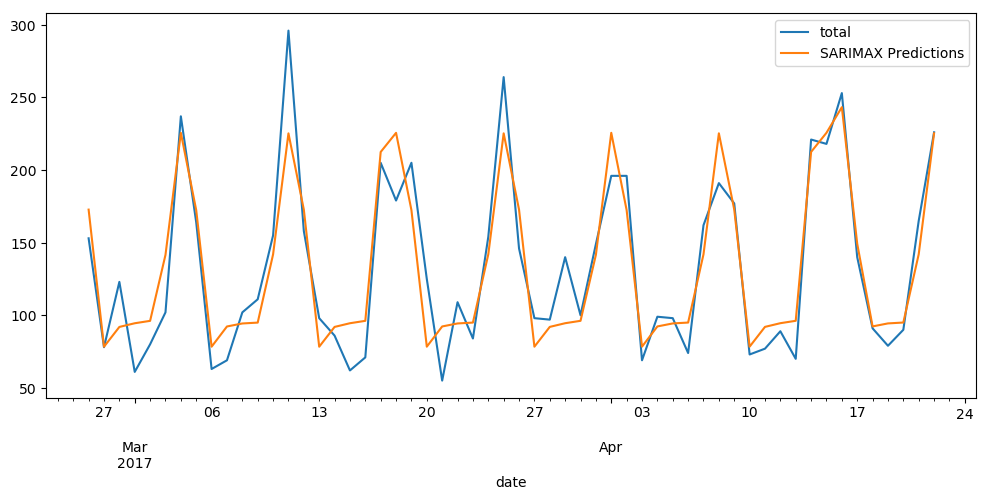

In [33]:
test.total.plot(figsize=(12,5),legend=True)
test_predictions.plot(legend=True);

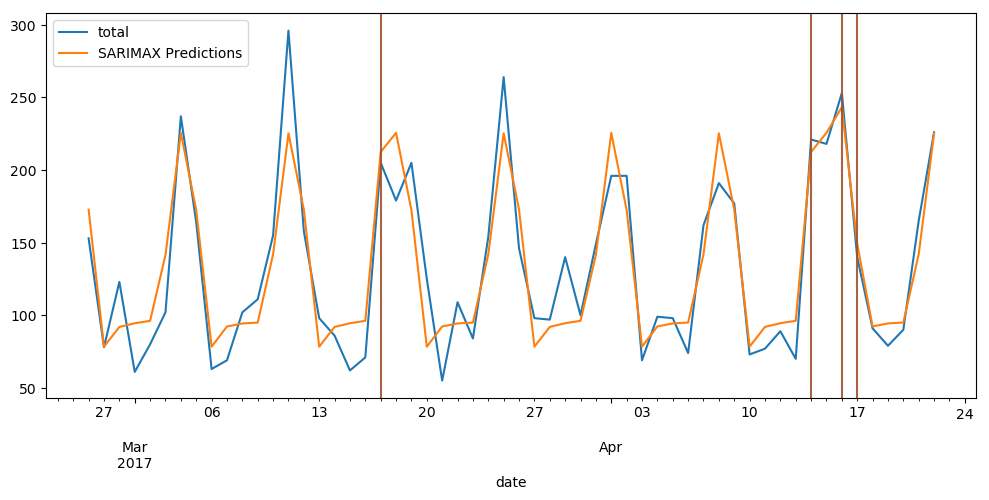

In [34]:
ax = test.total.plot(figsize=(12,5),legend=True)
test_predictions.plot(legend=True,ax=ax)

for holiday in test.query('holiday==1').index:
    ax.axvline(x=holiday,color='sienna',alpha=0.9);

In [35]:
print("MAE:", meanabs(test.total,test_predictions))
print("MSE:", mse(test.total,test_predictions))
print("RMSE:", rmse(test.total,test_predictions))

MAE: 18.653863482140554
MSE: 551.770978725956
RMSE: 23.489805846919126


## Forecast into Unknown Future

In [36]:
sarimax = SARIMAX(df['total'],exog=df[['holiday']],order=(1,0,1),seasonal_order=(2,0,2,7))
results = sarimax.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  478
Model:             SARIMAX(1, 0, 1)x(2, 0, 2, 7)   Log Likelihood               -2284.912
Date:                           Sat, 21 Sep 2024   AIC                           4585.824
Time:                                   15:59:42   BIC                           4619.181
Sample:                               01-01-2016   HQIC                          4598.938
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       67.9158      3.974     17.090      0.000      60.127      75.705
ar.L1          0.9983      0.005    192.504      0.000       0.988       1.008
ma.L1         -0.9808      0.010    -97.256      0.000      -1.001      -0.961
ar.S.L7        0.0058      0.013      0.451      0.652      -0.019       0.031
ar.S.L14       0.9942      0.013     77.265      0.000       0.969       1.019
ma.S.L7        0.0049      0.143      0.035      0.972      -0.275       0.285
ma.S.L14      -0.9949      0.056    -17.759      0.000      -1.105      -0.885
sigma2       758.9229      0.002   4.58e+05      0.000     758.920     758.926
===================================================================================
Ljung-Box (Q):                       48.22   Jarque-Bera (JB):                23.88
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.25
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.2e+22. Standard errors may be unstable.
"""

In [37]:
temp = pd.read_csv('Data/RestaurantVisitors.csv',index_col=0,parse_dates=True)
temp.index.freq = 'D'
temp.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [38]:
temp.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [39]:
exog_forecast = temp[-len(test):][['holiday']]
exog_forecast.head()

,holiday
date,
2017-04-06,0
2017-04-07,0
2017-04-08,0
2017-04-09,0
2017-04-10,0


In [40]:
df.shape, temp.shape

((478, 8), (517, 8))

In [41]:
test.shape

(56, 8)

In [42]:
forecast = results.predict(start=len(df),end=len(df)+len(test)-1,exog=exog_forecast).rename('SARIMAX Forecast')
forecast

2017-04-23    173.662886
2017-04-24     79.566134
2017-04-25     91.015538
2017-04-26     94.775975
2017-04-27     96.522058
2017-04-28    142.319544
2017-04-29    226.381223
2017-04-30    171.862041
2017-05-01    147.735193
2017-05-02     92.552890
2017-05-03    161.938036
2017-05-04    160.566076
2017-05-05    142.753884
2017-05-06    224.372154
2017-05-07    173.684163
2017-05-08     79.600067
2017-05-09     91.056764
2017-05-10     94.803827
2017-05-11     96.531761
2017-05-12    142.353769
2017-05-13    226.400509
2017-05-14    171.903951
2017-05-15     79.850211
2017-05-16     92.576123
2017-05-17     94.058625
2017-05-18     92.704597
2017-05-19    142.782880
2017-05-20    224.414481
2017-05-21    173.704783
2017-05-22    147.548990
2017-05-23     91.097110
2017-05-24     94.830957
2017-05-25     96.540950
2017-05-26    142.387194
2017-05-27    226.419159
2017-05-28    171.944969
2017-05-29     79.880259
2017-05-30     92.598691
2017-05-31    162.009964
2017-06-01     92.757877


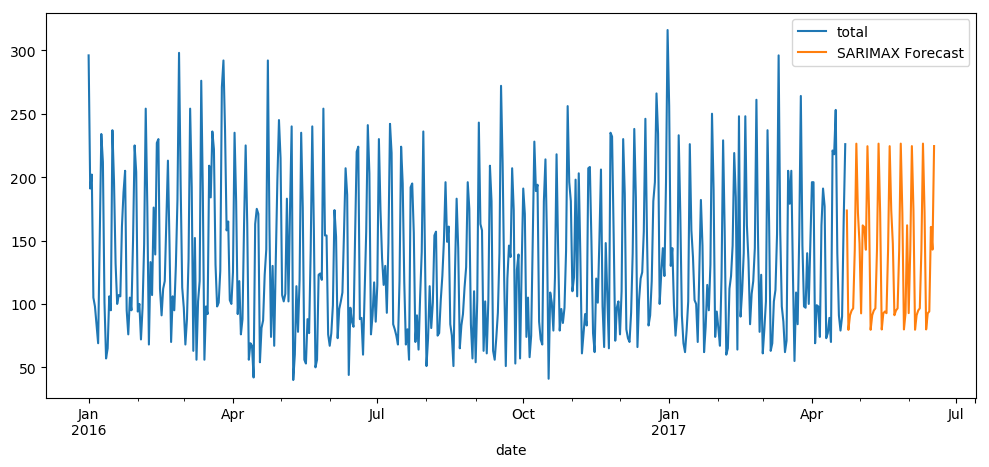

In [43]:
df.total.plot(figsize=(12,5),legend=True)
forecast.plot(legend=True);

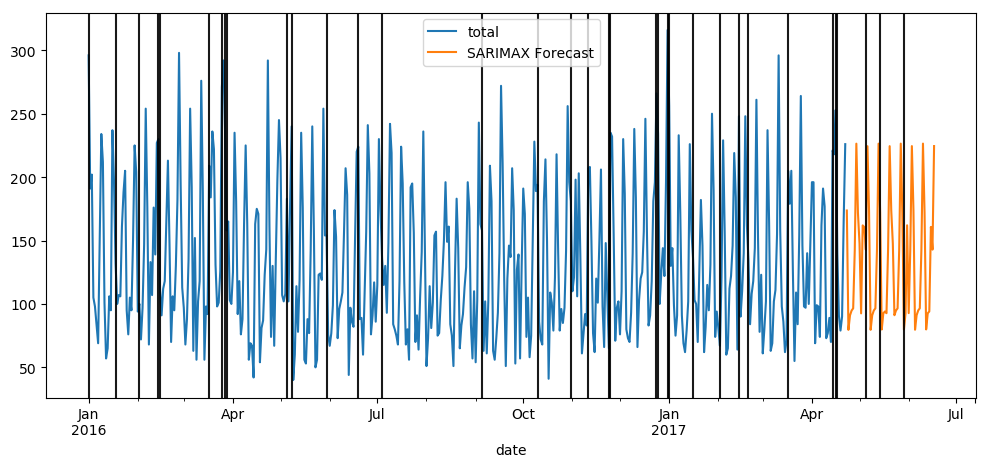

In [44]:
ax = df.total.plot(figsize=(12,5),legend=True)
forecast.plot(legend=True,ax=ax)

for holiday in temp.query('holiday==1').index:
    ax.axvline(x=holiday,color='black',alpha=0.9);

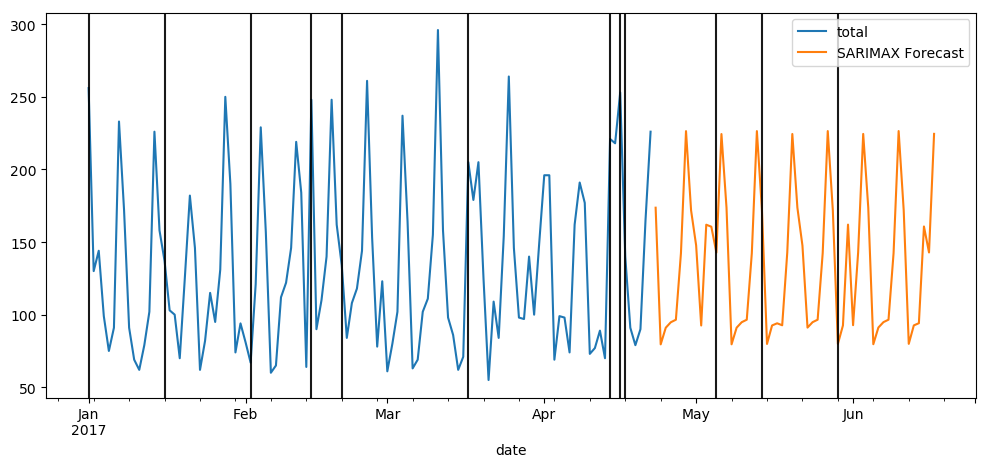

In [45]:
ax = temp['total']['2017-01-01':].plot(figsize=(12,5),legend=True)
forecast.plot(legend=True,ax=ax)

for holiday in temp['2017-01-01':].query('holiday==1').index:
    ax.axvline(x=holiday,color='black',alpha=0.9);